In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan_data_set.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().sum().sum()

149

In [9]:
(df.isnull().sum()/df.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [10]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

1.8667000751691305

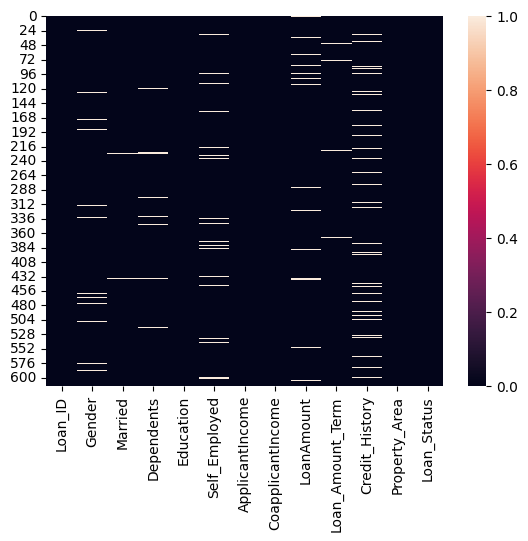

In [11]:
sns.heatmap(df.isnull())
plt.show()

In [12]:
mode = df["Gender"].mode()[0]
mode

'Male'

In [13]:
# mode1 = df["LoanAmount"].mode()[0]
# mode1

In [14]:
df["Gender"] = df["Gender"].fillna(mode)


In [15]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

In [17]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
im = SimpleImputer(strategy='most_frequent')
im_data = im.fit_transform(df)

In [20]:
a = pd .DataFrame(im_data, columns=df.columns)
a.index = df.index

In [21]:
a.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
a.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
pd.get_dummies(a).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Columns: 1638 entries, Loan_ID_LP001002 to Loan_Status_Y
dtypes: bool(1638)
memory usage: 982.3 KB


EONCODING

In [24]:
import category_encoders as ce

In [25]:
from sklearn.preprocessing import OneHotEncoder
Oh_en = OneHotEncoder()
oh_arrey = Oh_en.fit_transform(a["Gender"].values.reshape(-1,1)).toarray()

In [26]:
df1 = pd.DataFrame(oh_arrey,columns=["Gender_Male","Gender_Female"])
pd.concat([a,df1],axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Gender_Female
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,0.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1.0,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.0,1.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.0,1.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.0,1.0


In [27]:
df1.head()

,Gender_Male,Gender_Female
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
a['Education'] = le.fit_transform(a.Education)
a['Property_Area'] = le.fit_transform(a.Property_Area)
a['Gender'] = le.fit_transform(a.Gender)
a['Married'] = le.fit_transform(a.Married)
a['Self_Employed'] = le.fit_transform(a.Self_Employed)
a['Loan_Status'] = le.fit_transform(a.Loan_Status)


In [30]:
a.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [31]:
a.shape

(614, 13)

In [32]:
a['Property_Area'].unique()

array([2, 0, 1])

In [33]:
NEW_df = a.copy()

In [34]:
NEW_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


handling mixed data

In [35]:
NEW_df["Dependents"].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [36]:
NEW_df["Dependents"].replace("3+","3",inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_4876\2351576144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NEW_df["Dependents"].replace("3+","3",inplace=True)


In [37]:
NEW_df["Dependents"].astype("int64")

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

In [38]:
NEW_df.shape

(614, 13)

In [39]:
NEW_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
NEW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    int32 
 2   Married            614 non-null    int32 
 3   Dependents         614 non-null    object
 4   Education          614 non-null    int32 
 5   Self_Employed      614 non-null    int32 
 6   ApplicantIncome    614 non-null    object
 7   CoapplicantIncome  614 non-null    object
 8   LoanAmount         614 non-null    object
 9   Loan_Amount_Term   614 non-null    object
 10  Credit_History     614 non-null    object
 11  Property_Area      614 non-null    int32 
 12  Loan_Status        614 non-null    int32 
dtypes: int32(6), object(7)
memory usage: 48.1+ KB


In [41]:
NEW_df["CoapplicantIncome"].describe()

count     614.0
unique    287.0
top         0.0
freq      273.0
Name: CoapplicantIncome, dtype: float64

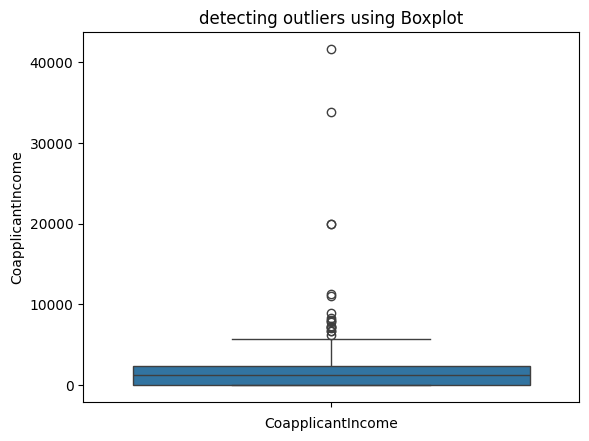

In [42]:
sns.boxplot(NEW_df["CoapplicantIncome"],vert=True)
plt.title("detecting outliers using Boxplot")
plt.xlabel('CoapplicantIncome')
plt.show()

In [43]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 2
    mean = np.mean(data)
    std = np.std(data)
    #print(mean,std)
    for i in data:
        
        z_score = (i-mean)/std
        #print(z_score)
        if (np.abs(z_score)>thres):
            
            outliers.append(i) #drive code
           
    return outliers
sample_outliers = detect_outliers_zscore(NEW_df["CoapplicantIncome"])
print("Outliers from Z-score method: ",sample_outliers)

Outliers from Z-score method:  [10968.0, 8106.0, 8980.0, 7750.0, 11300.0, 7873.0, 20000.0, 20000.0, 8333.0, 33837.0, 41667.0]


In [44]:
percentile25 = df['CoapplicantIncome'].quantile(0.25)
percentile75 = df['CoapplicantIncome'].quantile(0.75)

In [45]:
percentile25

0.0

In [46]:
percentile75

2297.25

In [47]:
IQR = percentile75 - percentile25
IQR

2297.25

In [48]:
upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25 - 1.5*IQR

In [49]:
print("upper limit",upper_limit)
print("lower limit",lower_limit)

upper limit 5743.125
lower limit -3445.875


In [50]:
df1 = NEW_df[NEW_df["CoapplicantIncome"]<= upper_limit]

In [51]:
#df1 = NEW_df[NEW_df["CoapplicantIncome"]> lower_limit]

In [52]:
df1.shape

(596, 13)

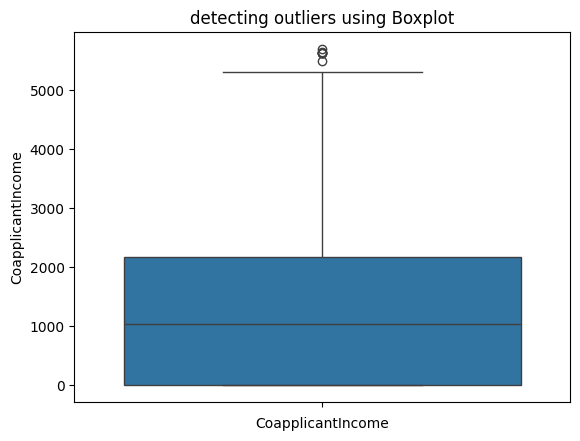

In [53]:
sns.boxplot(df1["CoapplicantIncome"],vert=True)
plt.title("detecting outliers using Boxplot")
plt.xlabel('CoapplicantIncome')
plt.show()

In [54]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# scalind

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
ss = StandardScaler().fit(df1[["ApplicantIncome"]])
df1_copy = df1.copy(deep=True)
df1_copy["ApplicantIncome"] = ss.transform(df1_copy[["ApplicantIncome"]])


In [57]:
df5=df1_copy.drop(labels=["Loan_ID"],axis=1)

In [58]:
df5.head(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072613,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,-0.133657,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,-0.391575,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,-0.459517,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,0.097215,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,0.002227,4196.0,267.0,360.0,1.0,2,1


In [59]:
df5.shape

(596, 12)

In [60]:
X =df5.iloc[:,:-1]
y = df5.iloc[:,-1]

In [61]:
X.ndim

2

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3,
                                                    random_state=45)

In [63]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
487,1,1,1,0,0,2.106633,0.0,500.0,360.0,1.0,2
70,1,1,0,0,0,-0.357686,3066.0,172.0,360.0,1.0,2
488,1,1,2,0,1,-0.133657,2083.0,160.0,360.0,1.0,1
599,1,1,2,0,0,0.061371,0.0,192.0,360.0,1.0,2
232,1,0,0,1,0,-0.360782,2598.0,120.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
387,1,1,0,1,0,-0.389946,3136.0,120.0,360.0,0.0,2
597,1,0,0,0,0,-0.393693,0.0,88.0,360.0,0.0,1
168,1,0,0,0,0,-0.515891,0.0,63.0,480.0,0.0,1
560,1,1,2,1,0,-0.281597,242.0,108.0,360.0,1.0,1


# multiple linear regresion

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()


In [66]:
lr.fit(X_train,y_train)

LinearRegression()

In [67]:
lr.score(X_test,y_test)*100

37.41095146984622

In [74]:
lr.coef_

array([-2.68759218e-02,  1.09877986e-01,  6.35804967e-03, -6.49707278e-02,
        7.15578113e-05,  1.74244578e-02,  1.08557408e-05, -4.21489925e-04,
       -1.75196736e-04,  7.15635822e-01,  9.44322406e-03])

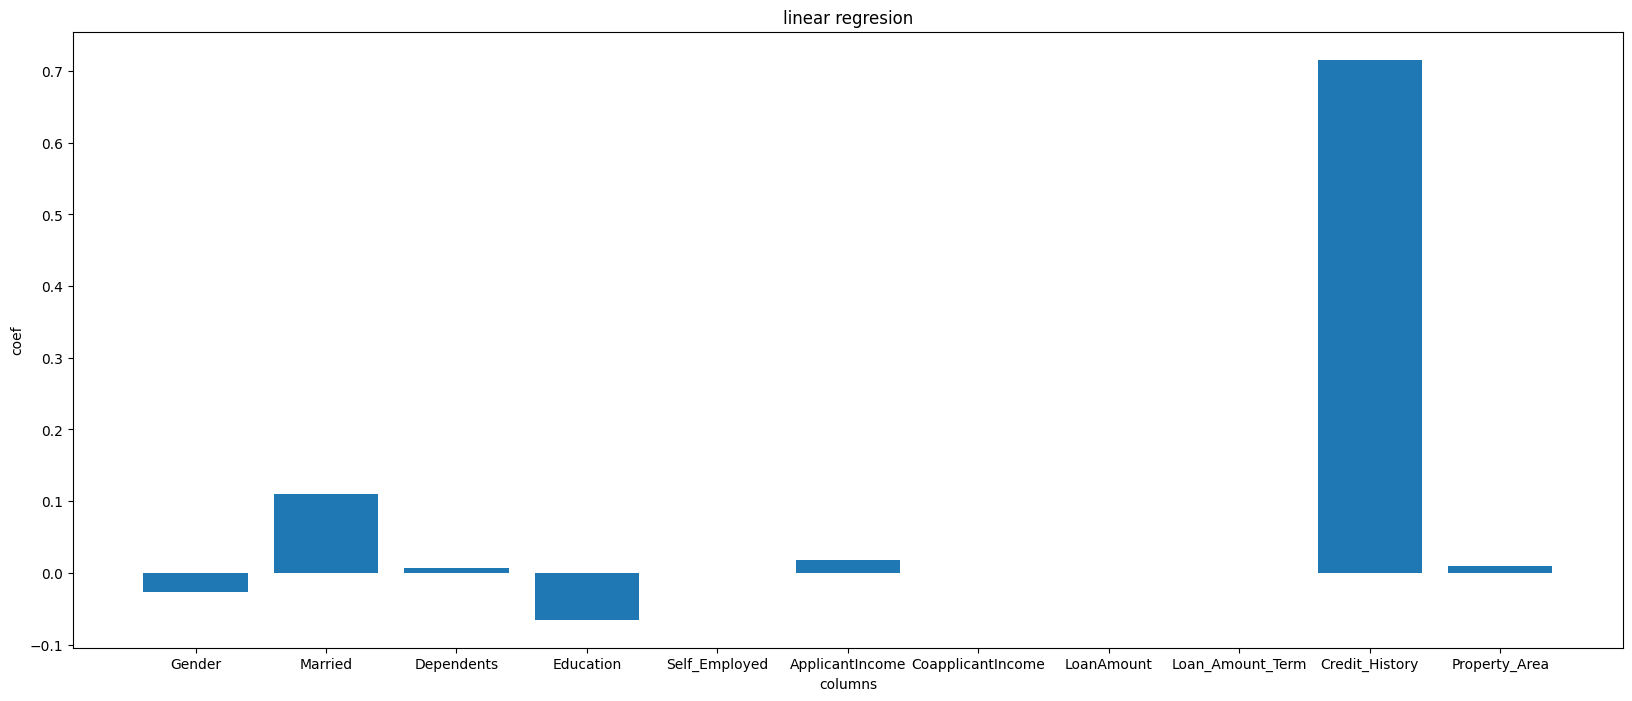

In [68]:
plt.figure(figsize=(20,8))
plt.bar(X.columns,lr.coef_)
plt.title("linear regresion")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [87]:
print(mean_squared_error(y_test,lr.predict(X_test)))
print(mean_absolute_error(y_test,lr.predict(X_test)))

0.13322221871216527
0.2798477033720363


LASSO

In [72]:
from sklearn.linear_model import Lasso , Ridge

In [98]:
la=Lasso(alpha=0.4)
la.fit(X_train,y_train)
la.score(X_test,y_test)*100


0.11203765065217475

In [88]:
print(mean_squared_error(y_test,la.predict(X_test)))
print(mean_absolute_error(y_test,la.predict(X_test)))

0.21263371591435998
0.426580144036316


Ridge Regression

In [83]:
ri = Ridge(alpha=10)
ri.fit(X_train,y_train)
ri.score(X_test,y_test)*100

36.30719462198989

In [89]:
print(mean_squared_error(y_test,ri.predict(X_test)))
print(mean_absolute_error(y_test,ri.predict(X_test)))

0.13557159036173305
0.3030583775396439


In [101]:
df_comparization=  pd.DataFrame({"col_name":X.columns,"linearRegresion":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df_comparization

,col_name,linearRegresion,Lasso,Ridge
0,Gender,-0.026876,0.000000,-0.017984
1,Married,0.109878,0.000000,0.096101
2,Dependents,0.006358,0.000000,0.005465
3,Education,-0.064971,-0.000000,-0.062437
4,Self_Employed,0.000072,0.000000,0.002479
5,ApplicantIncome,0.017424,-0.000000,0.013639
6,CoapplicantIncome,0.000011,0.000014,0.000011
7,LoanAmount,-0.000421,-0.000081,-0.000384
8,Loan_Amount_Term,-0.000175,-0.000154,-0.000181
9,Credit_History,0.715636,0.000000,0.592681
